In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=94394bf23f6c48eee6235f6324791aa9


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | the pas
Processing Record 2 of Set 13 | cape town
Processing Record 3 of Set 13 | yellowknife
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | albany
Processing Record 6 of Set 13 | ballina
Processing Record 7 of Set 13 | punta arenas
Processing Record 8 of Set 13 | khor
Processing Record 9 of Set 13 | tuktoyaktuk
Processing Record 10 of Set 13 | bluff
Processing Record 11 of Set 13 | baijiantan
Processing Record 12 of Set 13 | maseru
Processing Record 13 of Set 13 | vaini
Processing Record 14 of Set 13 | sao filipe
Processing Record 15 of Set 13 | provideniya
Processing Record 16 of Set 13 | lebu
Processing Record 17 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 18 of Set 13 | saint-philippe
Processing Record 19 of Set 13 | iqaluit
Processing Record 20 of Set 13 | faya
Processing Record 21 of Set 13 | mastung
Processing Record 22 of Set 13 | kyabram


Processing Record 35 of Set 16 | hamilton
Processing Record 36 of Set 16 | arkhara
Processing Record 37 of Set 16 | palmer
Processing Record 38 of Set 16 | sitka
Processing Record 39 of Set 16 | sao felix do xingu
Processing Record 40 of Set 16 | bilma
Processing Record 41 of Set 16 | hirara
Processing Record 42 of Set 16 | san jose
Processing Record 43 of Set 16 | carnarvon
Processing Record 44 of Set 16 | taoudenni
Processing Record 45 of Set 16 | dhing
Processing Record 46 of Set 16 | lavrentiya
Processing Record 47 of Set 16 | vila franca do campo
Processing Record 48 of Set 16 | college
Processing Record 49 of Set 16 | chabahar
Processing Record 50 of Set 16 | baykit
Processing Record 1 of Set 17 | hobart
Processing Record 2 of Set 17 | grindavik
Processing Record 3 of Set 17 | codrington
Processing Record 4 of Set 17 | zhanatas
City not found. Skipping...
Processing Record 5 of Set 17 | meyungs
City not found. Skipping...
Processing Record 6 of Set 17 | seydi
Processing Record 7 

City not found. Skipping...
Processing Record 17 of Set 20 | amapa
Processing Record 18 of Set 20 | port macquarie
Processing Record 19 of Set 20 | ugoofaaru
Processing Record 20 of Set 20 | lianran
Processing Record 21 of Set 20 | bilibino
Processing Record 22 of Set 20 | barcelona
Processing Record 23 of Set 20 | manaure
Processing Record 24 of Set 20 | malindi
Processing Record 25 of Set 20 | geraldton
Processing Record 26 of Set 20 | leua
Processing Record 27 of Set 20 | acapulco
Processing Record 28 of Set 20 | camacupa
Processing Record 29 of Set 20 | sumbuya
Processing Record 30 of Set 20 | prince george
Processing Record 31 of Set 20 | cayenne
Processing Record 32 of Set 20 | adrar
Processing Record 33 of Set 20 | salekhard
Processing Record 34 of Set 20 | utiroa
City not found. Skipping...
Processing Record 35 of Set 20 | gambela
Processing Record 36 of Set 20 | gurupa
Processing Record 37 of Set 20 | khormuj
City not found. Skipping...
Processing Record 38 of Set 20 | hammerf

Processing Record 2 of Set 24 | martapura
Processing Record 3 of Set 24 | mundo nuevo
Processing Record 4 of Set 24 | barbar
City not found. Skipping...
Processing Record 5 of Set 24 | husavik
Processing Record 6 of Set 24 | yala
Processing Record 7 of Set 24 | ouadda
Processing Record 8 of Set 24 | bolshaya murta
City not found. Skipping...
Processing Record 9 of Set 24 | querfurt
Processing Record 10 of Set 24 | carutapera
Processing Record 11 of Set 24 | manggar
Processing Record 12 of Set 24 | kaspiyskiy
Processing Record 13 of Set 24 | kaspiysk
Processing Record 14 of Set 24 | ust-koksa
Processing Record 15 of Set 24 | cheuskiny
City not found. Skipping...
Processing Record 16 of Set 24 | iguape
Processing Record 17 of Set 24 | praia da vitoria
Processing Record 18 of Set 24 | bac lieu
Processing Record 19 of Set 24 | rosamorada
Processing Record 20 of Set 24 | douglas
Processing Record 21 of Set 24 | leh
Processing Record 22 of Set 24 | girona
Processing Record 23 of Set 24 | pue

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,The Pas,53.8251,-101.2541,68.02,83,0,0.00,CA,2022-08-19 14:54:52
1,Cape Town,-33.9258,18.4232,58.10,81,75,18.41,ZA,2022-08-19 14:54:11
2,Yellowknife,62.4560,-114.3525,57.72,77,75,0.00,CA,2022-08-19 14:54:53
3,Rikitea,-23.1203,-134.9692,71.60,74,79,5.44,PF,2022-08-19 14:54:53
4,Albany,42.6001,-73.9662,79.63,63,25,6.53,US,2022-08-19 14:50:45
5,Ballina,-28.8667,153.5667,60.84,68,0,9.53,AU,2022-08-19 14:52:52
6,Punta Arenas,-53.1500,-70.9167,41.11,70,40,17.27,CL,2022-08-19 14:51:14
7,Khor,47.8861,134.9464,58.87,98,100,5.97,RU,2022-08-19 14:54:54
8,Tuktoyaktuk,69.4541,-133.0374,44.60,93,100,12.66,CA,2022-08-19 14:54:54
9,Bluff,-46.6000,168.3333,50.81,88,100,6.80,NZ,2022-08-19 14:54:55


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Pas,CA,2022-08-19 14:54:52,53.8251,-101.2541,68.02,83,0,0.00
1,Cape Town,ZA,2022-08-19 14:54:11,-33.9258,18.4232,58.10,81,75,18.41
2,Yellowknife,CA,2022-08-19 14:54:53,62.4560,-114.3525,57.72,77,75,0.00
3,Rikitea,PF,2022-08-19 14:54:53,-23.1203,-134.9692,71.60,74,79,5.44
4,Albany,US,2022-08-19 14:50:45,42.6001,-73.9662,79.63,63,25,6.53
5,Ballina,AU,2022-08-19 14:52:52,-28.8667,153.5667,60.84,68,0,9.53
6,Punta Arenas,CL,2022-08-19 14:51:14,-53.1500,-70.9167,41.11,70,40,17.27
7,Khor,RU,2022-08-19 14:54:54,47.8861,134.9464,58.87,98,100,5.97
8,Tuktoyaktuk,CA,2022-08-19 14:54:54,69.4541,-133.0374,44.60,93,100,12.66
9,Bluff,NZ,2022-08-19 14:54:55,-46.6000,168.3333,50.81,88,100,6.80


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1660921180.7354848

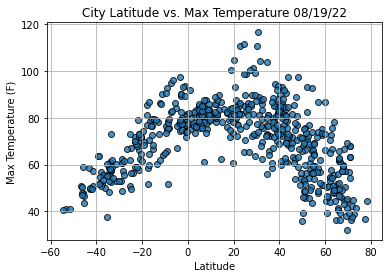

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

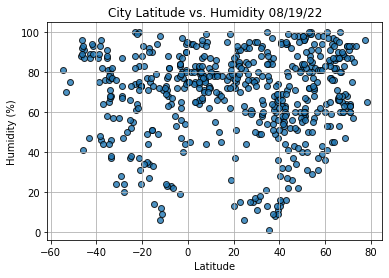

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

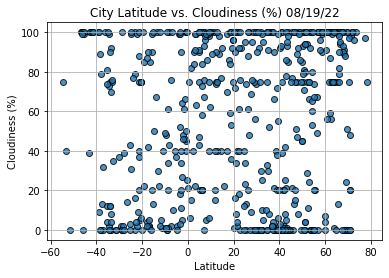

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

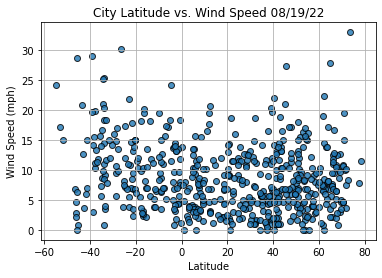

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [49]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [50]:
index13 = city_data_df.loc[13]

In [51]:
index13

City                   Sao Filipe
Country                        CV
Date          2022-08-19 14:54:56
Lat                       14.8961
Lng                      -24.4956
Max Temp                     78.1
Humidity                       78
Cloudiness                     92
Wind Speed                   8.16
Name: 13, dtype: object

In [52]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3      False
4       True
       ...  
556     True
557     True
558     True
559    False
560    False
Name: Lat, Length: 561, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,The Pas,CA,2022-08-19 14:54:52,53.8251,-101.2541,68.02,83,0,0.00
2,Yellowknife,CA,2022-08-19 14:54:53,62.4560,-114.3525,57.72,77,75,0.00
4,Albany,US,2022-08-19 14:50:45,42.6001,-73.9662,79.63,63,25,6.53
7,Khor,RU,2022-08-19 14:54:54,47.8861,134.9464,58.87,98,100,5.97
8,Tuktoyaktuk,CA,2022-08-19 14:54:54,69.4541,-133.0374,44.60,93,100,12.66


In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

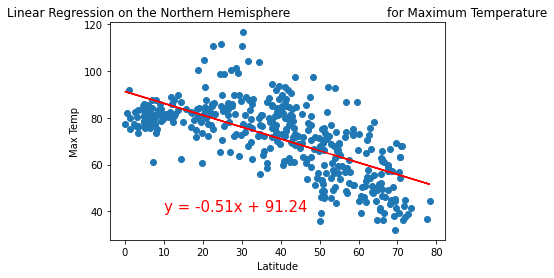

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

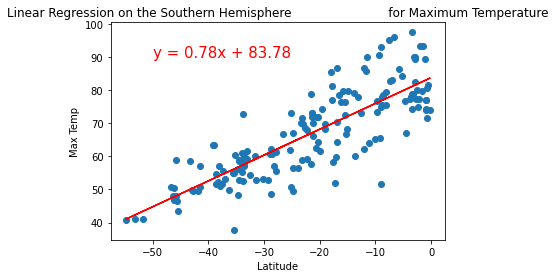

In [56]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

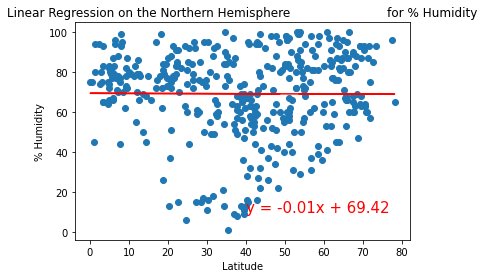

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

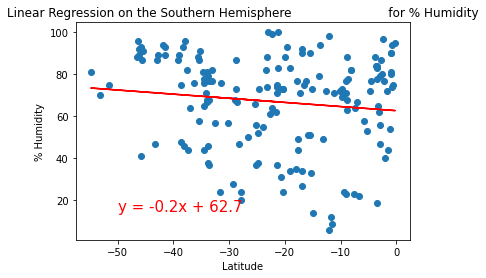

In [58]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

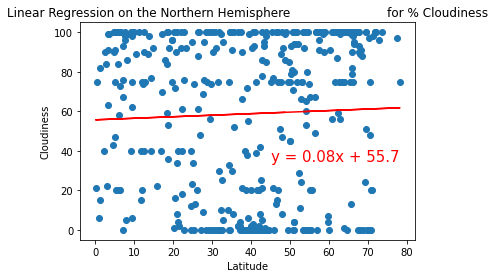

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(45,35))

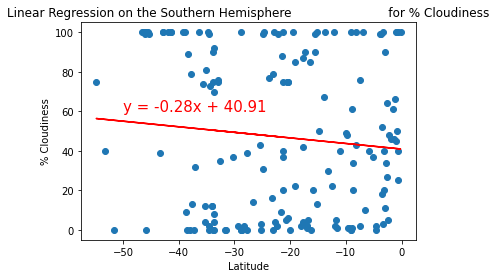

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

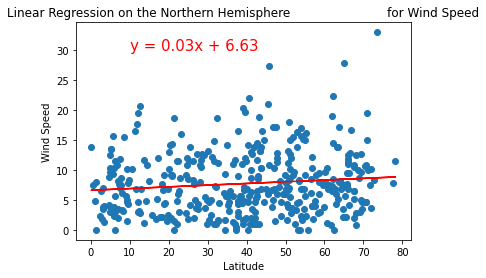

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,30))

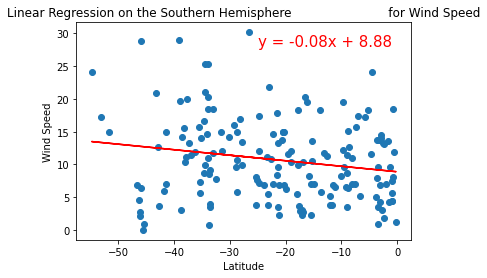

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,28))